<h1> Kode Script Klasifikasi Data Calon Kandidat Outsourcing TOGI dengan Decision Tree C4.5

<h2> Pengolahan Data

<h3> Import Dataset

In [1]:
import numpy as np
import pandas as pd
import joblib

d:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv("C:/Users/AHMAD ARDHY/Documents/data_skripsi.csv", delimiter=";")
data

,usia,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman,label
0,9,1,1,1,1,1
1,18,1,1,1,1,1
2,19,1,1,1,1,1
3,20,1,1,1,1,1
4,21,1,1,1,1,1
...,...,...,...,...,...,...
271,57,0,1,0,1,0
272,57,0,1,1,0,0
273,57,1,1,1,1,0
274,58,1,1,0,0,0


<h3> Analisis Data Eksploratif

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   usia                             276 non-null    int64
 1   pendidikan                       276 non-null    int64
 2   lama_pengalaman                  276 non-null    int64
 3   kesesuaian_posisi_dg_skills      276 non-null    int64
 4   kesesuaian_posisi_dg_pengalaman  276 non-null    int64
 5   label                            276 non-null    int64
dtypes: int64(6)
memory usage: 13.1 KB


In [4]:
data.isnull().sum()

usia                               0
pendidikan                         0
lama_pengalaman                    0
kesesuaian_posisi_dg_skills        0
kesesuaian_posisi_dg_pengalaman    0
label                              0
dtype: int64

<h4> Melakukan Kategorik Data Usia

In [5]:
# Menentukan batas atas untuk setiap kategori usia
batas_kategori = [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]

# Menambahkan kolom baru 'Kategori Usia' ke DataFrame
data['kategori_usia'] = pd.cut(data['usia'], bins=batas_kategori, labels=False, right=False)

# Menampilkan DataFrame hasil
data.head(10)

,usia,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman,label,kategori_usia
0,9,1,1,1,1,1,1
1,18,1,1,1,1,1,3
2,19,1,1,1,1,1,3
3,20,1,1,1,1,1,3
4,21,1,1,1,1,1,3
5,22,1,1,1,1,1,3
6,23,1,1,1,1,1,3
7,24,1,1,1,1,1,4
8,25,1,1,1,1,1,4
9,26,1,1,1,1,1,4


In [6]:
data = data.drop('usia',axis=1)

In [7]:
data

,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman,label,kategori_usia
0,1,1,1,1,1,1
1,1,1,1,1,1,3
2,1,1,1,1,1,3
3,1,1,1,1,1,3
4,1,1,1,1,1,3
...,...,...,...,...,...,...
271,0,1,0,1,0,9
272,0,1,1,0,0,9
273,1,1,1,1,0,9
274,1,1,0,0,0,9


In [8]:
data.duplicated().sum()

112

In [9]:
data['label'].value_counts()

label
0    254
1     22
Name: count, dtype: int64

In [10]:
data_olah = data.copy()

In [11]:
data_olah

,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman,label,kategori_usia
0,1,1,1,1,1,1
1,1,1,1,1,1,3
2,1,1,1,1,1,3
3,1,1,1,1,1,3
4,1,1,1,1,1,3
...,...,...,...,...,...,...
271,0,1,0,1,0,9
272,0,1,1,0,0,9
273,1,1,1,1,0,9
274,1,1,0,0,0,9


Tidak perlu dilakukan kategorisasi data

In [12]:
# Mendapatkan nama kolom yang ingin dipindahkan
nama_kolom = data_olah.columns[5]  # Mengambil nama kolom ke-7 (indeks dimulai dari 0)

# # Mengatur urutan kolom sesuai dengan keinginan
urutan_kolom = [nama_kolom] + [kolom for kolom in data_olah.columns if kolom != nama_kolom]

# # Membuat DataFrame baru dengan urutan kolom yang diinginkan
data_olah = data_olah[urutan_kolom]

In [13]:
data_olah.head(10)

,kategori_usia,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman,label
0,1,1,1,1,1,1
1,3,1,1,1,1,1
2,3,1,1,1,1,1
3,3,1,1,1,1,1
4,3,1,1,1,1,1
5,3,1,1,1,1,1
6,3,1,1,1,1,1
7,4,1,1,1,1,1
8,4,1,1,1,1,1
9,4,1,1,1,1,1


In [14]:
data_olah['kategori_usia'].value_counts()

kategori_usia
4    48
5    48
3    40
6    30
1    21
2    21
0    18
8    17
9    17
7    16
Name: count, dtype: int64

In [15]:
data_olah['pendidikan'].value_counts()

pendidikan
1    148
0    128
Name: count, dtype: int64

In [16]:
data_olah['lama_pengalaman'].value_counts()

lama_pengalaman
1    166
0    110
Name: count, dtype: int64

In [17]:
data_olah['kesesuaian_posisi_dg_skills'].value_counts()

kesesuaian_posisi_dg_skills
1    158
0    118
Name: count, dtype: int64

In [18]:
data_olah['kesesuaian_posisi_dg_pengalaman'].value_counts()

kesesuaian_posisi_dg_pengalaman
1    139
0    137
Name: count, dtype: int64

In [19]:
data_olah['label'].value_counts()

label
0    254
1     22
Name: count, dtype: int64

In [20]:
data_olah.columns

Index(['kategori_usia', 'pendidikan', 'lama_pengalaman',
       'kesesuaian_posisi_dg_skills', 'kesesuaian_posisi_dg_pengalaman',
       'label'],
      dtype='object')

EDA yanga dapat dilakukan univariat menampilkan per fitur, dan analisis

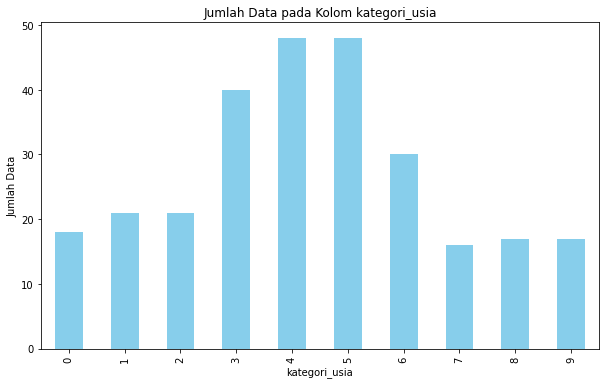

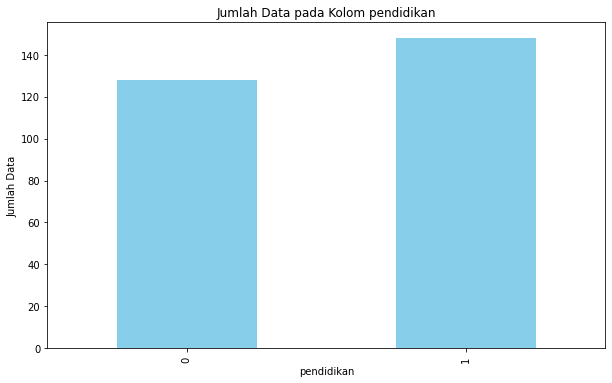

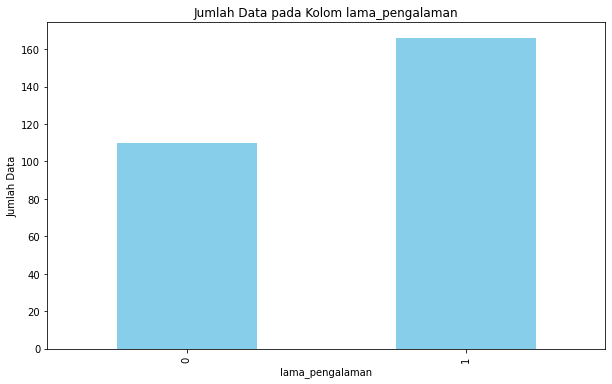

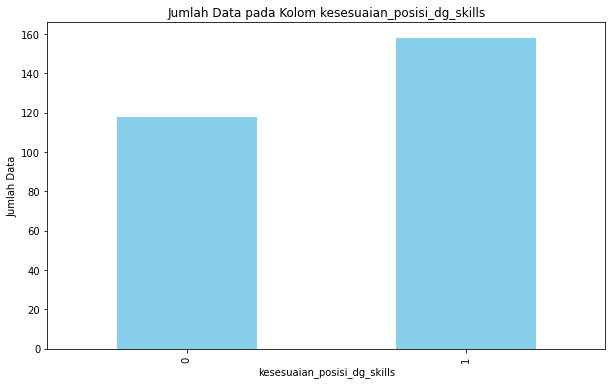

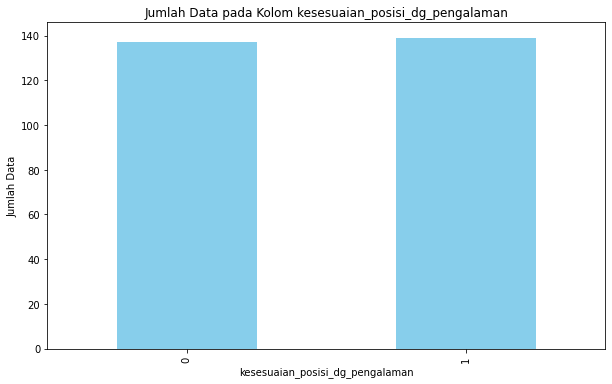

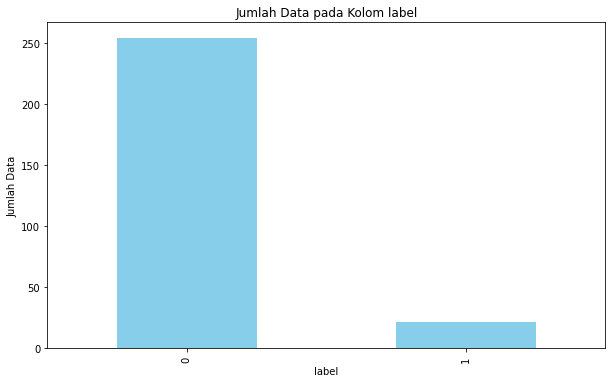

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Loop melalui setiap kolom dan membuat grafik batang
for column in data_olah.columns:
    plt.figure(figsize=(10, 6))  # Ubah ukuran sesuai kebutuhan
    data_olah[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Jumlah Data pada Kolom {column}')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')
    plt.show()


<h2> Penanganan Data Umur menjadi Dummy Variabel

In [24]:
# Create dummy variables
df_dummy = pd.get_dummies(data_olah['kategori_usia'], drop_first=True)
df_dummy = df_dummy.astype(int)

# Mendapatkan nama kategori asli
kategori_asli = data_olah['kategori_usia'].unique()

# Membuat dictionary untuk mapping nama kolom baru
mapping_dict = {old_col: f'{kategori}_dummy' for kategori, old_col in zip(kategori_asli, df_dummy.columns)}

# Mengganti nama kolom menggunakan metode rename
df_dummy = df_dummy.rename(columns=mapping_dict)

# Menampilkan DataFrame setelah perubahan nama kolom
df_dummy

,1_dummy,3_dummy,4_dummy,5_dummy,0_dummy,2_dummy,6_dummy,7_dummy,8_dummy
0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
271,0,0,0,0,0,0,0,0,1
272,0,0,0,0,0,0,0,0,1
273,0,0,0,0,0,0,0,0,1
274,0,0,0,0,0,0,0,0,1


In [25]:
# Menambahkan kolom dummy ke DataFrame utama (data_olah)
data_olah = pd.concat([data_olah, df_dummy], axis=1)

# Menampilkan DataFrame setelah penggabungan
data_olah

,kategori_usia,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman,label,1_dummy,3_dummy,4_dummy,5_dummy,0_dummy,2_dummy,6_dummy,7_dummy,8_dummy
0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
1,3,1,1,1,1,1,0,0,1,0,0,0,0,0,0
2,3,1,1,1,1,1,0,0,1,0,0,0,0,0,0
3,3,1,1,1,1,1,0,0,1,0,0,0,0,0,0
4,3,1,1,1,1,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,9,0,1,0,1,0,0,0,0,0,0,0,0,0,1
272,9,0,1,1,0,0,0,0,0,0,0,0,0,0,1
273,9,1,1,1,1,0,0,0,0,0,0,0,0,0,1
274,9,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
data_olah = data_olah.drop('kategori_usia',axis=1)

In [27]:
data_olah

,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman,label,1_dummy,3_dummy,4_dummy,5_dummy,0_dummy,2_dummy,6_dummy,7_dummy,8_dummy
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,1,0,0,0,0,0,0
2,1,1,1,1,1,0,0,1,0,0,0,0,0,0
3,1,1,1,1,1,0,0,1,0,0,0,0,0,0
4,1,1,1,1,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,1,0,1,0,0,0,0,0,0,0,0,0,1
272,0,1,1,0,0,0,0,0,0,0,0,0,0,1
273,1,1,1,1,0,0,0,0,0,0,0,0,0,1
274,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
# Misalkan ini adalah urutan kolom yang diinginkan
new_column_order = ['0_dummy', '1_dummy', '2_dummy', '3_dummy', '4_dummy','5_dummy', '6_dummy', '7_dummy', '8_dummy', 'pendidikan','lama_pengalaman','kesesuaian_posisi_dg_skills','kesesuaian_posisi_dg_pengalaman','label']

# Menyusun ulang urutan kolom
data_olah = data_olah[new_column_order]

# Menampilkan DataFrame setelah perubahan urutan kolom
data_olah


,0_dummy,1_dummy,2_dummy,3_dummy,4_dummy,5_dummy,6_dummy,7_dummy,8_dummy,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman,label
0,0,1,0,0,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,1,0,0,0,0,1,1,1,1,1
2,0,0,0,0,1,0,0,0,0,1,1,1,1,1
3,0,0,0,0,1,0,0,0,0,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,0,0,0,0,0,0,0,1,0,1,0,1,0
272,0,0,0,0,0,0,0,0,1,0,1,1,0,0
273,0,0,0,0,0,0,0,0,1,1,1,1,1,0
274,0,0,0,0,0,0,0,0,1,1,1,0,0,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memilih kolom fitur (X) dan kolom target (y)
fitur_cols = ['0_dummy', '1_dummy', '2_dummy', '3_dummy', '4_dummy','5_dummy', '6_dummy', '7_dummy', '8_dummy', 'pendidikan', 'lama_pengalaman', 'kesesuaian_posisi_dg_skills', 'kesesuaian_posisi_dg_pengalaman']
X = data_olah[fitur_cols]
y = data_olah['label']

In [30]:
X

,0_dummy,1_dummy,2_dummy,3_dummy,4_dummy,5_dummy,6_dummy,7_dummy,8_dummy,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman
0,0,1,0,0,0,0,0,0,0,1,1,1,1
1,0,0,0,0,1,0,0,0,0,1,1,1,1
2,0,0,0,0,1,0,0,0,0,1,1,1,1
3,0,0,0,0,1,0,0,0,0,1,1,1,1
4,0,0,0,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,0,0,0,0,0,0,0,1,0,1,0,1
272,0,0,0,0,0,0,0,0,1,0,1,1,0
273,0,0,0,0,0,0,0,0,1,1,1,1,1
274,0,0,0,0,0,0,0,0,1,1,1,0,0


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
271    0
272    0
273    0
274    0
275    0
Name: label, Length: 276, dtype: int64

<h2> SMOTE IMBALANCED DATASET

In [121]:
import numpy as np
from imblearn.over_sampling import SMOTE

In [122]:
smote = SMOTE(random_state=42)  # You can adjust the sampling strategy as needed
X_resampled, y_resampled = smote.fit_resample(X, y)

In [123]:
X_resampled

,0_dummy,1_dummy,2_dummy,3_dummy,4_dummy,5_dummy,6_dummy,7_dummy,8_dummy,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman
0,0,1,0,0,0,0,0,0,0,1,1,1,1
1,0,0,0,0,1,0,0,0,0,1,1,1,1
2,0,0,0,0,1,0,0,0,0,1,1,1,1
3,0,0,0,0,1,0,0,0,0,1,1,1,1
4,0,0,0,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,0,0,0,0,0,1,0,0,0,1,1,1,0
504,0,0,0,0,0,1,0,0,0,1,1,1,1
505,1,0,0,0,0,0,0,0,0,1,1,1,1
506,0,0,0,0,0,1,0,0,0,1,1,1,1


In [124]:
X_resampled.to_csv("data_x_resample.csv")

In [125]:
y_resampled

0      1
1      1
2      1
3      1
4      1
      ..
503    1
504    1
505    1
506    1
507    1
Name: label, Length: 508, dtype: int64

In [126]:
y_resampled.to_csv("data_y_resample.csv")

<h2> Feature Selection

hanya menampilkan feature mana yang paling berkontribusi ke dalam fitur 
information gain

<h2> Pemodelan Decision Tree C4.5

Kode menggunakan library

In [127]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [128]:
# Menampilkan jumlah baris dan kolom dari X_train
print(f'Jumlah baris dan kolom dari X_train: {np.shape(X_train)}')

# Menampilkan jumlah baris dan kolom dari X_test
print(f'Jumlah baris dan kolom dari X_test: {np.shape(X_test)}')

# Menampilkan jumlah baris dan kolom dari y_train
print(f'Jumlah baris dan kolom dari y_train: {np.shape(y_train)}')

# Menampilkan jumlah baris dan kolom dari y_test
print(f'Jumlah baris dan kolom dari y_test: {np.shape(y_test)}')

Jumlah baris dan kolom dari X_train: (406, 13)
Jumlah baris dan kolom dari X_test: (102, 13)
Jumlah baris dan kolom dari y_train: (406,)
Jumlah baris dan kolom dari y_test: (102,)


In [129]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(criterion='entropy')  # Gunakan 'gini' atau 'entropy' sebagai kriteria pemisahan
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [130]:
from sklearn import tree

# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 5, 
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

DecisionTreeClassifier(max_depth=5, random_state=0)

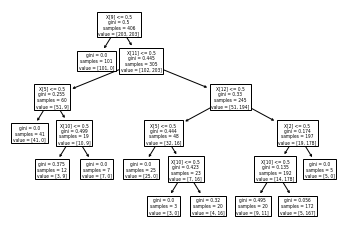

In [131]:
tree.plot_tree(clf);

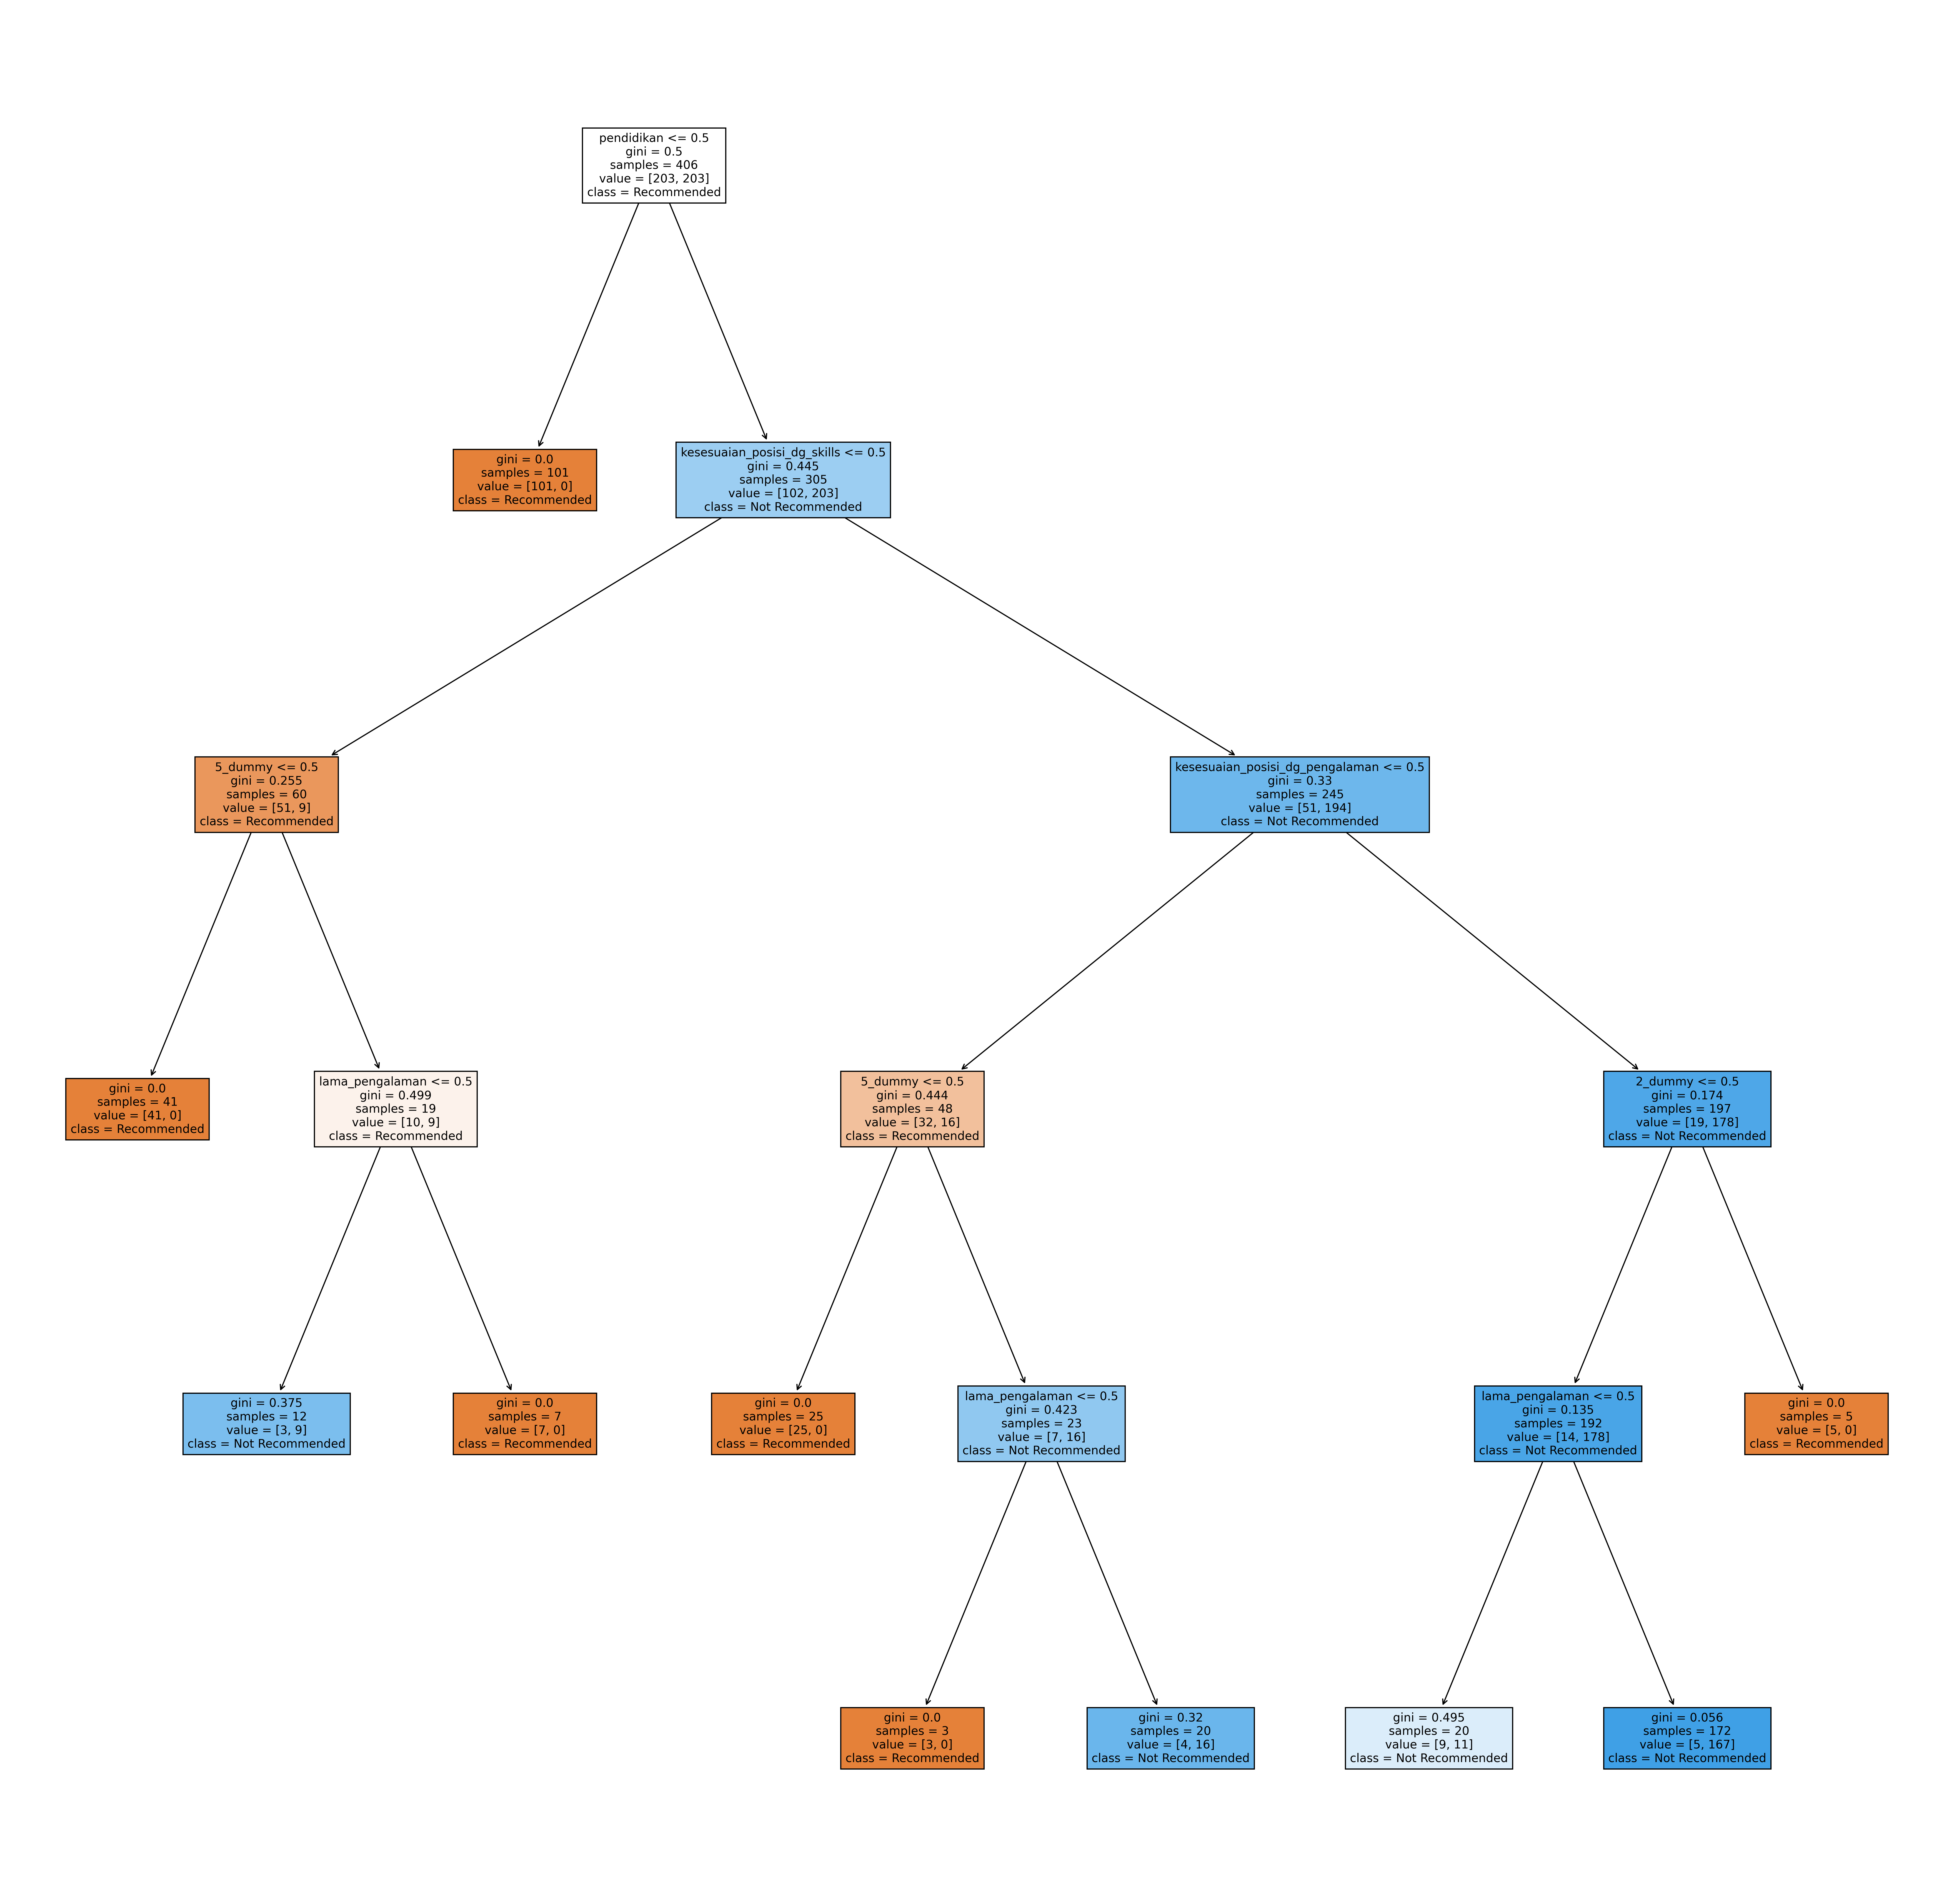

In [132]:
fn= ['0_dummy', '1_dummy', '2_dummy', '3_dummy', '4_dummy','5_dummy', '6_dummy', '7_dummy', '8_dummy', 'pendidikan', 'lama_pengalaman','kesesuaian_posisi_dg_skills', 'kesesuaian_posisi_dg_pengalaman']
cn=['Recommended', 'Not Recommended']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [133]:
# Membuat prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [134]:
print('Training set score: {:.2f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(model.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.93


In [135]:
cm_dct = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix dari model Decision Tree C4.5 Data SMOTE: \n', cm_dct)

Confusion matrix dari model Decision Tree C4.5 Data SMOTE: 
 [[45  6]
 [ 1 50]]


In [136]:
# Mengukur performa model
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

In [137]:
# Menampilkan hasil
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.93
Confusion Matrix:
[[45  6]
 [ 1 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        51
           1       0.89      0.98      0.93        51

    accuracy                           0.93       102
   macro avg       0.94      0.93      0.93       102
weighted avg       0.94      0.93      0.93       102



<h2> Build Model Decision Tree With no Resampling Data

Setelah dilakukan resampling data, ternyata ditemukan sebuah kesalahan library SMOTE dalam melakukan penambahan sampling data, dalam menambahkan label 1 terdapat kesalahan dalam pelabelan di mana kasus yang harusnya mendapat label 0 dari rule based, namun diberikan label 1. Akhirnya dibuat solusi untuk melakukan duplikasi data pada data yang memiliki label 1

In [32]:
data_olah1 = data_olah.copy()

In [33]:
data_olah1

,0_dummy,1_dummy,2_dummy,3_dummy,4_dummy,5_dummy,6_dummy,7_dummy,8_dummy,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman,label
0,0,1,0,0,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,1,0,0,0,0,1,1,1,1,1
2,0,0,0,0,1,0,0,0,0,1,1,1,1,1
3,0,0,0,0,1,0,0,0,0,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,0,0,0,0,0,0,0,1,0,1,0,1,0
272,0,0,0,0,0,0,0,0,1,0,1,1,0,0
273,0,0,0,0,0,0,0,0,1,1,1,1,1,0
274,0,0,0,0,0,0,0,0,1,1,1,0,0,0


In [34]:
data_olah1['label'].value_counts()

label
0    254
1     22
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memilih kolom fitur (X) dan kolom target (y)
fitur_cols = ['0_dummy', '1_dummy', '2_dummy', '3_dummy', '4_dummy','5_dummy', '6_dummy', '7_dummy', '8_dummy', 'pendidikan', 'lama_pengalaman', 'kesesuaian_posisi_dg_skills', 'kesesuaian_posisi_dg_pengalaman']
X_asli = data_olah1[fitur_cols]
y_asli = data_olah1['label']

In [36]:
X_asli

,0_dummy,1_dummy,2_dummy,3_dummy,4_dummy,5_dummy,6_dummy,7_dummy,8_dummy,pendidikan,lama_pengalaman,kesesuaian_posisi_dg_skills,kesesuaian_posisi_dg_pengalaman
0,0,1,0,0,0,0,0,0,0,1,1,1,1
1,0,0,0,0,1,0,0,0,0,1,1,1,1
2,0,0,0,0,1,0,0,0,0,1,1,1,1
3,0,0,0,0,1,0,0,0,0,1,1,1,1
4,0,0,0,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,0,0,0,0,0,0,0,1,0,1,0,1
272,0,0,0,0,0,0,0,0,1,0,1,1,0
273,0,0,0,0,0,0,0,0,1,1,1,1,1
274,0,0,0,0,0,0,0,0,1,1,1,0,0


In [37]:
y_asli

0      1
1      1
2      1
3      1
4      1
      ..
271    0
272    0
273    0
274    0
275    0
Name: label, Length: 276, dtype: int64

In [38]:
# Membagi data menjadi data latih dan data uji
X_train_asli, X_test_asli, y_train_asli, y_test_asli = train_test_split(X_asli, y_asli, test_size=0.2, random_state=42)

In [39]:
# Menampilkan jumlah baris dan kolom dari X_train_asli
print(f'Jumlah baris dan kolom dari X_train_asli: {np.shape(X_train_asli)}')

# Menampilkan jumlah baris dan kolom dari X_test_asli
print(f'Jumlah baris dan kolom dari X_test_asli: {np.shape(X_test_asli)}')

# Menampilkan jumlah baris dan kolom dari y_train_asli
print(f'Jumlah baris dan kolom dari y_train_asli: {np.shape(y_train_asli)}')

# Menampilkan jumlah baris dan kolom dari y_test_asli
print(f'Jumlah baris dan kolom dari y_test_asli: {np.shape(y_test_asli)}')

Jumlah baris dan kolom dari X_train_asli: (220, 13)
Jumlah baris dan kolom dari X_test_asli: (56, 13)
Jumlah baris dan kolom dari y_train_asli: (220,)
Jumlah baris dan kolom dari y_test_asli: (56,)


In [42]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=10)  
model.fit(X_train_asli, y_train_asli)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [43]:
from sklearn import tree

# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 10, 
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train_asli, y_train_asli)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

DecisionTreeClassifier(max_depth=10, random_state=0)

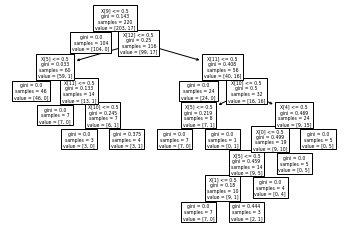

In [44]:
tree.plot_tree(clf);

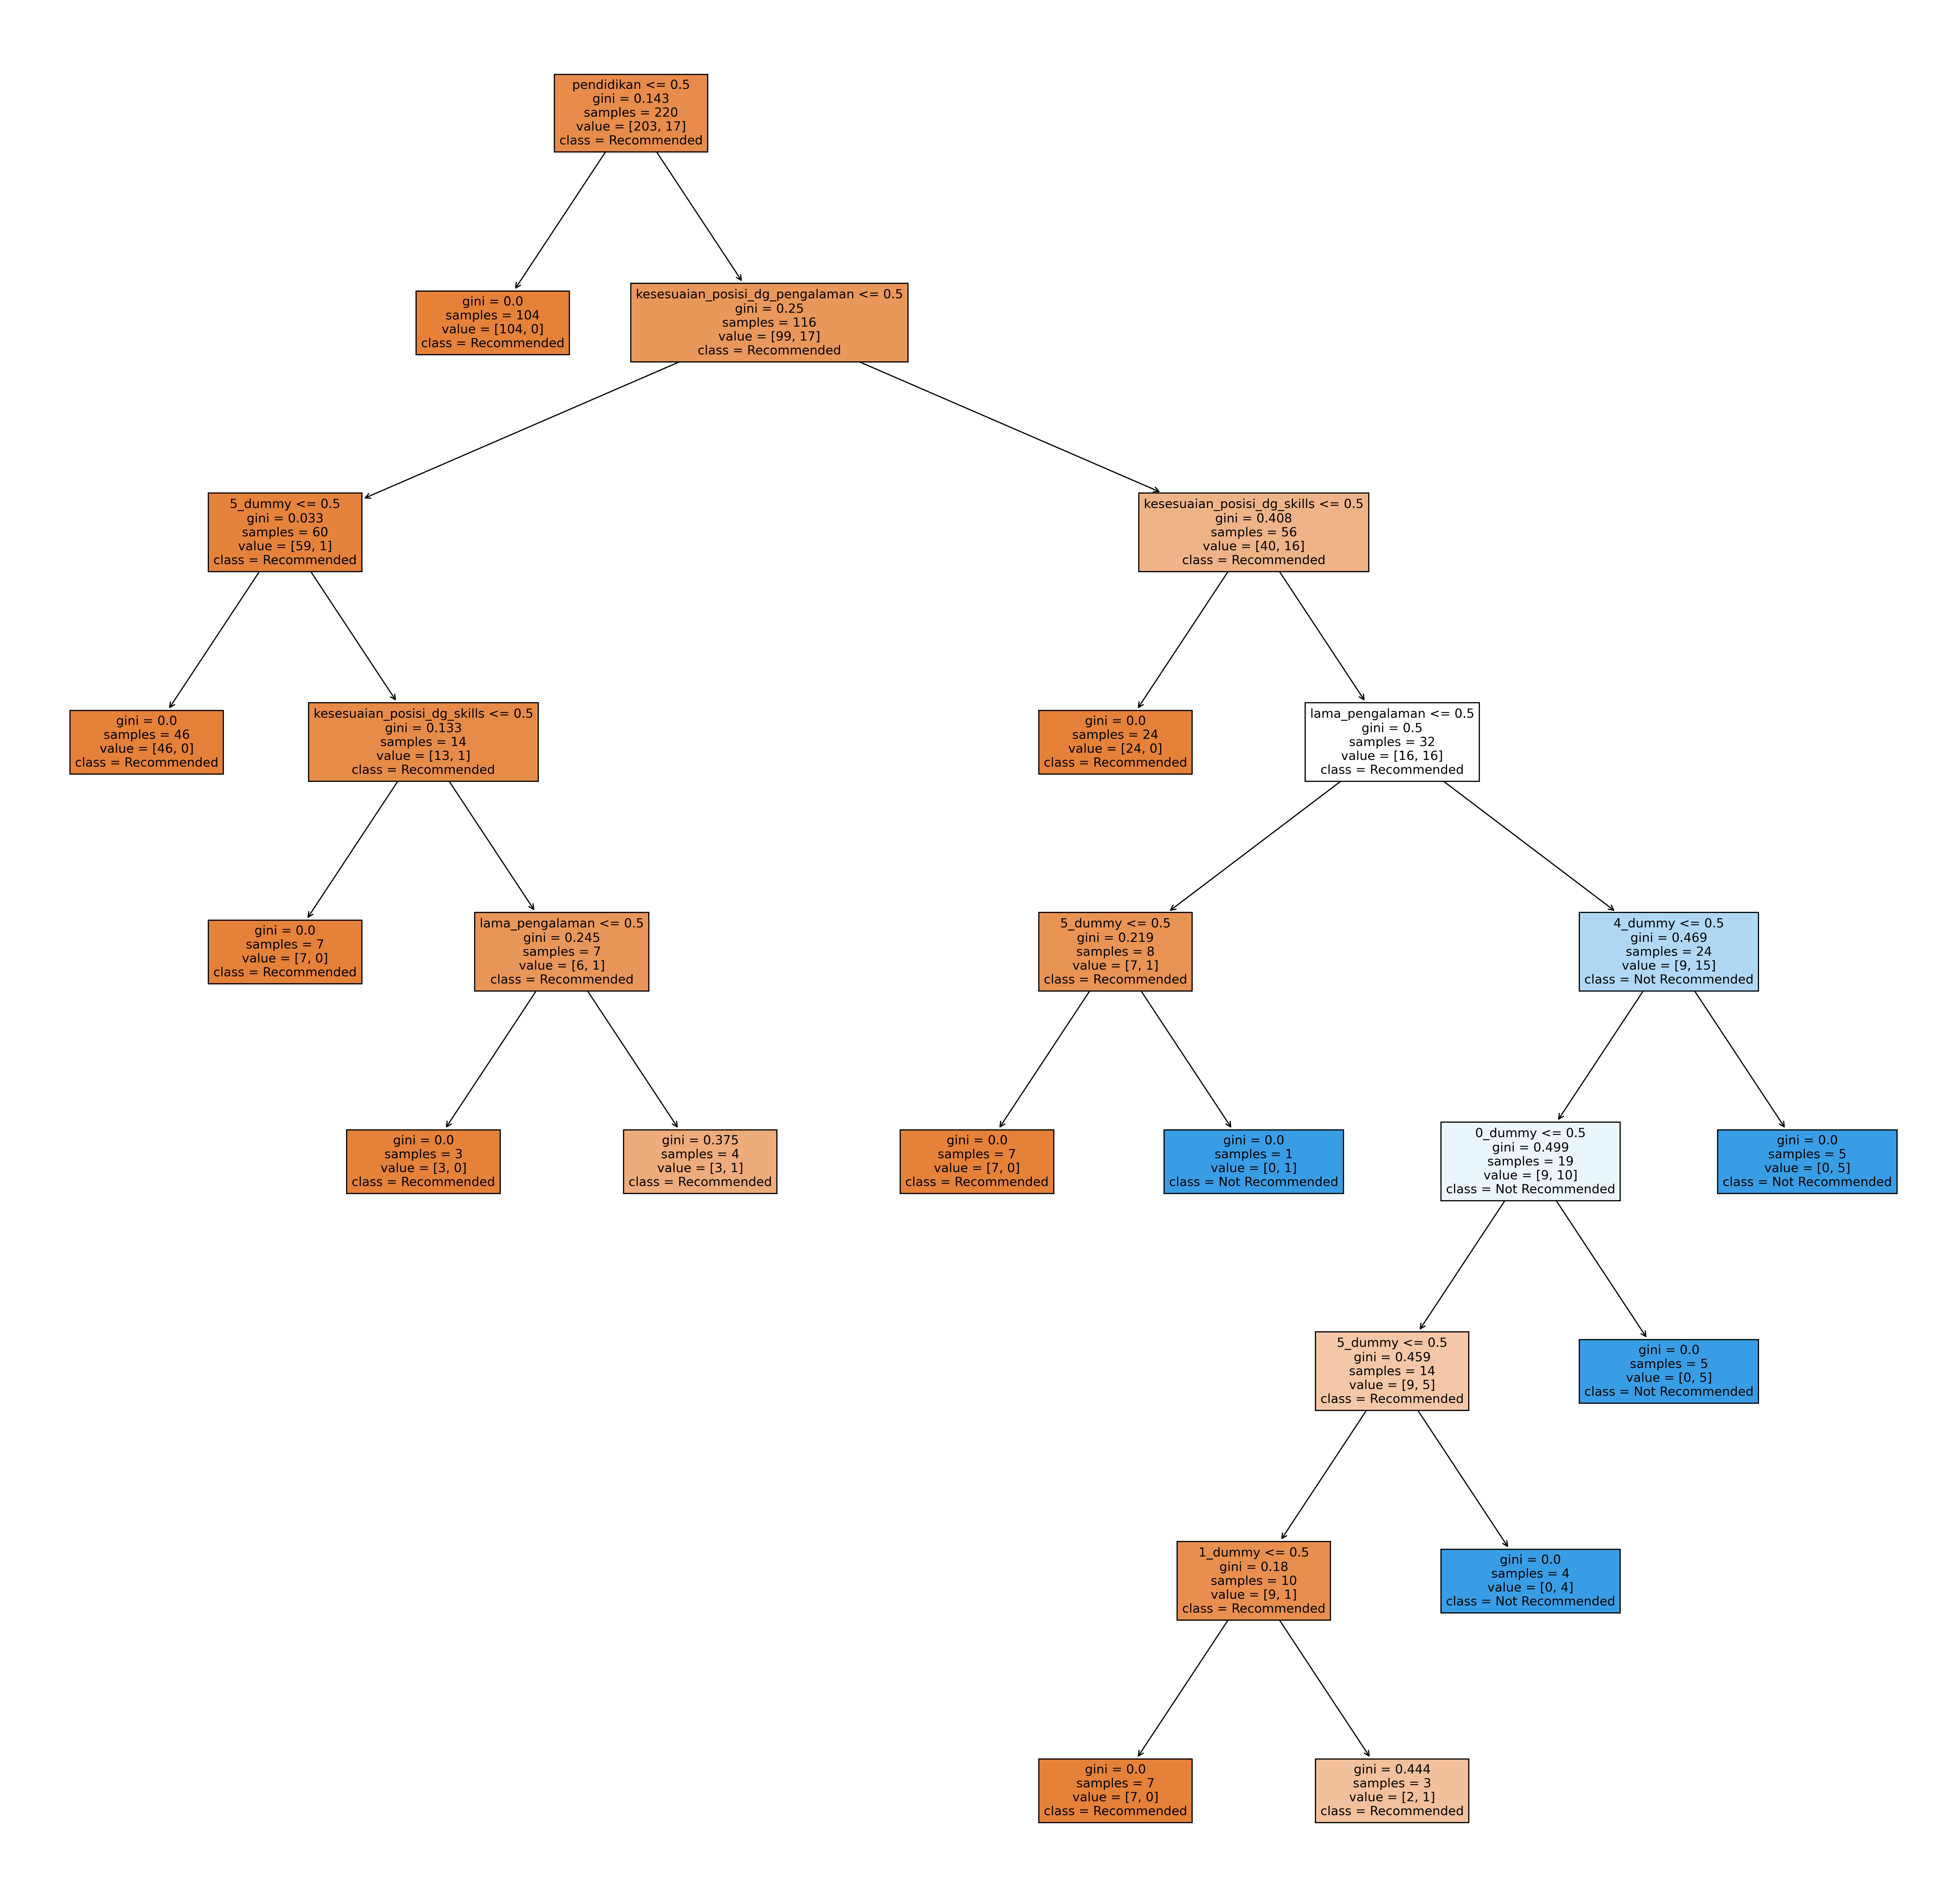

In [45]:
fn= ['0_dummy', '1_dummy', '2_dummy', '3_dummy', '4_dummy','5_dummy', '6_dummy', '7_dummy', '8_dummy', 'pendidikan', 'lama_pengalaman','kesesuaian_posisi_dg_skills', 'kesesuaian_posisi_dg_pengalaman']
cn=['Recommended', 'Not Recommended']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [46]:
# Membuat prediksi
y_pred_train_asli = model.predict(X_train_asli)
y_pred_test_asli = model.predict(X_test_asli)

In [47]:
print('Training set score: {:.2f}'.format(model.score(X_train_asli, y_train_asli)))
print('Test set score: {:.2f}'.format(model.score(X_test_asli, y_test_asli)))

Training set score: 0.99
Test set score: 0.96


In [48]:
cm_dct1 = confusion_matrix(y_test_asli, y_pred_test_asli)

print('Confusion matrix dari model Decision Tree C4.5 TANPA SMOTE: \n', cm_dct1)

Confusion matrix dari model Decision Tree C4.5 TANPA SMOTE: 
 [[50  1]
 [ 1  4]]


In [49]:
# Mengukur performa model
accuracy = accuracy_score(y_test_asli, y_pred_test_asli)
conf_matrix = confusion_matrix(y_test_asli, y_pred_test_asli)
class_report = classification_report(y_test_asli, y_pred_test_asli)

In [50]:
# Menampilkan hasil
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.96
Confusion Matrix:
[[50  1]
 [ 1  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.80      0.80      0.80         5

    accuracy                           0.96        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.96      0.96      0.96        56



<h2> Save a Model to Joblib For Deployment

In [51]:
joblib.dump(model, "model_klasifikasi_dctc45.model")

['model_klasifikasi_dctc45.model']